<a href="https://colab.research.google.com/github/shravani1029/2216111_AIML_BOOTCAMP/blob/main/stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import csv


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/RELIANCE.NS (3).csv",index_col=False)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-11,476.904419,478.439880,453.451721,457.934235,440.298859,7898492
1,2016-02-12,462.565338,462.565338,439.880371,449.018738,431.726685,13530925
2,2016-02-15,454.690002,471.208405,454.690002,468.930023,450.871155,8899342
3,2016-02-16,471.084595,474.502197,459.147736,460.906067,443.156219,6010968
4,2016-02-17,463.159698,474.229767,453.897491,471.827545,453.657104,7126582
...,...,...,...,...,...,...,...
1726,2023-02-06,2315.000000,2321.000000,2305.800049,2311.449951,2311.449951,6847679
1727,2023-02-07,2312.000000,2327.399902,2293.000000,2305.899902,2305.899902,6985001
1728,2023-02-08,2313.000000,2359.899902,2307.000000,2351.949951,2351.949951,9765490
1729,2023-02-09,2353.449951,2370.850098,2334.000000,2356.050049,2356.050049,6079228


In [ ]:
df.style.hide_index()

<ipython-input-27-046e9c3a6dbb>:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.style.hide_index()


Date,Open,High,Low,Close,Adj Close,Volume
2016-02-11,476.904419,478.439880,453.451721,457.934235,440.298859,7898492
2016-02-12,462.565338,462.565338,439.880371,449.018738,431.726685,13530925
2016-02-15,454.690002,471.208405,454.690002,468.930023,450.871155,8899342
2016-02-16,471.084595,474.502197,459.147736,460.906067,443.156219,6010968
2016-02-17,463.159698,474.229767,453.897491,471.827545,453.657104,7126582
2016-02-18,476.953949,479.801971,463.605469,465.636230,447.704254,6660867
2016-02-19,465.586700,471.901855,464.274139,467.741272,449.728149,4723683
2016-02-22,467.617462,479.603821,467.617462,476.632019,458.276550,5893738
2016-02-23,477.028259,479.058990,466.948792,470.366394,452.252228,8763783
2016-02-24,468.013702,474.774597,466.577301,471.852325,453.680908,7008431


In [ ]:
#rows and columes in the data
df.shape

(1731, 7)

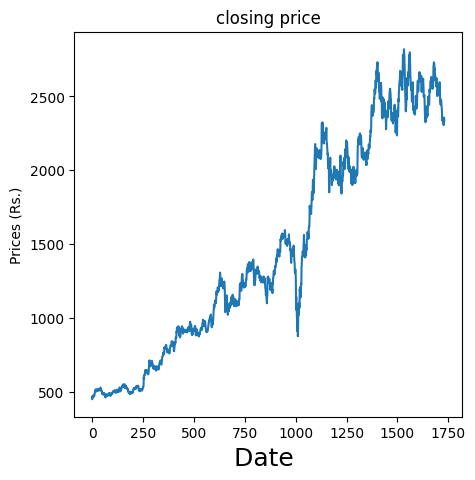

In [ ]:
#visualizing the closing price history
plt.figure(figsize=(5,5))
plt.title("closing price")
plt.plot(df['Close'])
plt.xlabel('Date ', fontsize=18)
plt.ylabel('Prices (Rs.)')
plt.show()

In [ ]:
#create a new datafrea,me with only the closing col
data = df.filter(["Close"])
#convert the dataframse to a numpuy array
dataset =data.values
#get the numder of rows to train model on
training_data_len =math.ceil( len(dataset)* .8)

training_data_len

1385

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset.reshape(-1,1))

scaled_data

array([[0.00376049],
       [0.        ],
       [0.00839844],
       ...,
       [0.80264301],
       [0.8043724 ],
       [0.79618955]])

In [ ]:
#create thr taning dta set
#create the scaled traning data set
train_data = scaled_data[0: training_data_len, :]
#split the data into x_train y_train
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00376049, 0.        , 0.00839844, 0.00501399, 0.00962059,
       0.00700914, 0.00789703, 0.01164709, 0.00900429, 0.00963105,
       0.00784481, 0.00915053, 0.01255587, 0.01561648, 0.0198366 ,
       0.0222078 , 0.02086028, 0.02516396, 0.02823503, 0.02197799,
       0.02255251, 0.02364932, 0.02380601, 0.02406715, 0.02286588,
       0.02520575, 0.02731581, 0.02951987, 0.02562358, 0.0237851 ,
       0.02709644, 0.02935274, 0.02896624, 0.02672039, 0.02684574,
       0.02515351, 0.02657414, 0.02730535, 0.02711732, 0.02794255,
       0.02942585, 0.03332213, 0.03305053, 0.02731581, 0.02812013,
       0.0276605 , 0.02305391, 0.02306434, 0.02357619, 0.0188338 ,
       0.01590898, 0.01679687, 0.01446745, 0.01494796, 0.01435255,
       0.01303637, 0.01599254, 0.01587763, 0.01438389, 0.01801902])]
[0.014958396703509097]

[array([0.00376049, 0.        , 0.00839844, 0.00501399, 0.00962059,
       0.00700914, 0.00789703, 0.01164709, 0.00900429, 0.00963105,
       0.00784481, 0.00915053, 0.0

In [ ]:
#convert the y_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1325, 60, 1)

In [ ]:
#build the LSTM model
model =  Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#train the model
model.fit(x_train, y_train, batch_size= 5, epochs=10)

Epoch 1/10
265/265 [==============================] - 14s 42ms/step - loss: 0.0025
Epoch 2/10
265/265 [==============================] - 11s 41ms/step - loss: 6.4104e-04
Epoch 3/10
265/265 [==============================] - 11s 41ms/step - loss: 5.1267e-04
Epoch 4/10
265/265 [==============================] - 11s 40ms/step - loss: 4.5009e-04
Epoch 5/10
265/265 [==============================] - 11s 41ms/step - loss: 3.9567e-04
Epoch 6/10
265/265 [==============================] - 11s 41ms/step - loss: 3.9829e-04
Epoch 7/10
265/265 [==============================] - 11s 42ms/step - loss: 3.6577e-04
Epoch 8/10
265/265 [==============================] - 11s 41ms/step - loss: 3.3156e-04
Epoch 9/10
265/265 [==============================] - 11s 41ms/step - loss: 2.3608e-04
Epoch 10/10
265/265 [==============================] - 11s 42ms/step - loss: 2.3126e-04


In [ ]:
#create the testing data set
#create a new array contaning scale values from 1325 to 2003
test_data = scaled_data[training_data_len - 60: , :]
x_test =[]
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])



In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshap
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

11/11 [==============================] - 1s 20ms/step


In [ ]:
#get thr root mean square error
rmse =  np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

81.18847450413655

<ipython-input-43-fb7e1a3ccc53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


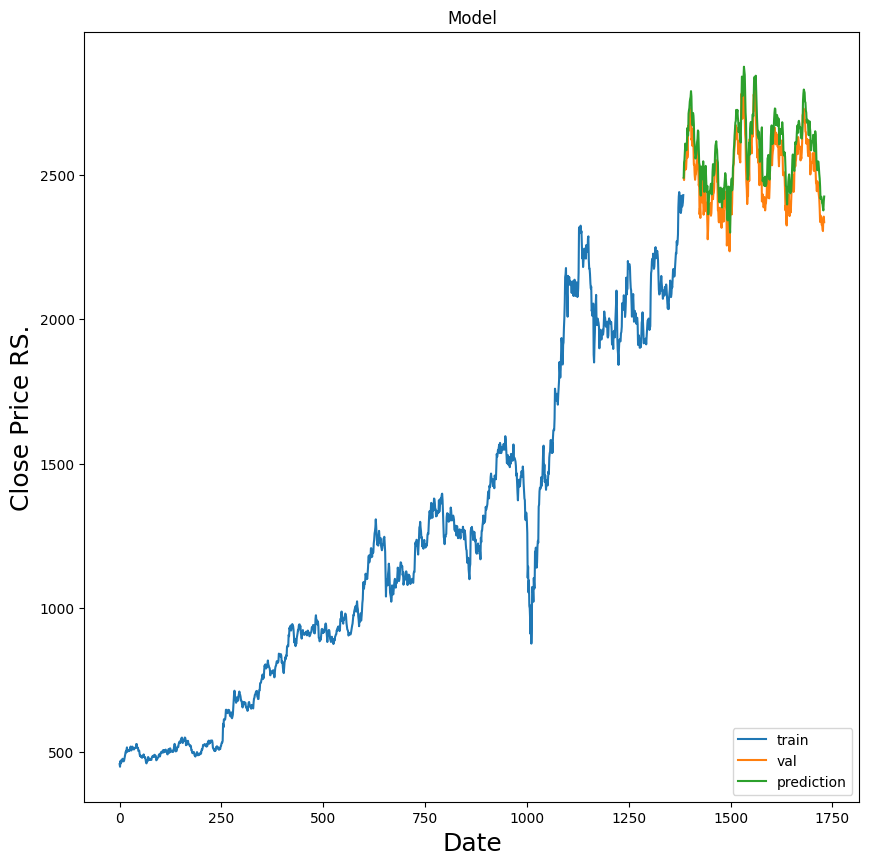

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len: ]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(10,10))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price RS.',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['train','val','prediction'], loc= 'lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
1385,2489.899902,2491.165527
1386,2482.699951,2542.960693
1387,2524.449951,2553.767334
1388,2548.050049,2583.068115
1389,2527.850098,2609.067383
...,...,...
1726,2311.449951,2399.117676
1727,2305.899902,2386.246094
1728,2351.949951,2377.503174
1729,2356.050049,2409.349609


In [ ]:
real = valid['Close'].values
pred = valid['Predictions'].values
n=len(pred)
accuracy=0
for i in range(n):
  accuracy+=(abs(real[i]-pred[i])/real[i])*100
accuper=100-accuracy/n
print(accuper)

97.13212576889212


In [ ]:
new_df= df.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_saled = scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_saled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,( X_test.shape[0],x_test.shape[1], 1))
pred_price=model.predict(X_test)
pred_price =scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 26ms/step
[[2413.7336]]


In [ ]:

pre2=pd.read_csv('/content/drive/MyDrive/RELIANCE.NS (4).csv',index_col=False)
pre2


,Date,Open,High,Low,Close,Adj Close,Volume
0,23-02-2022,2401.100098,2406.550049,2368.000000,2374.050049,2366.923828,3373615
1,24-02-2022,2305.000000,2339.899902,2243.399902,2255.750000,2248.979004,11466725
2,25-02-2022,2280.100098,2307.949951,2276.250000,2283.949951,2277.094238,6724094
3,28-02-2022,2243.000000,2367.350098,2243.000000,2359.550049,2352.467529,9828768
4,02-03-2022,2334.449951,2401.000000,2329.199951,2398.550049,2391.350342,9909226
...,...,...,...,...,...,...,...
245,17-02-2023,2420.000000,2447.500000,2410.600098,2440.199951,2440.199951,5450092
246,20-02-2023,2445.000000,2449.750000,2410.100098,2414.399902,2414.399902,4078245
247,21-02-2023,2424.000000,2446.800049,2412.350098,2434.100098,2434.100098,6143298
248,22-02-2023,2425.949951,2430.000000,2375.050049,2378.899902,2378.899902,5087729


In [ ]:
pre2.loc[235].at["Close"]

2329.0